# FIN 514 - PS4 Q1 LR
**Spring 2022**



In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [5]:
# input parameters

start_step = 51
N = 1001
S0 = 100.0
K = 105.0
sigma = 0.3
r = 0.04 
T = 0.5 
q = 0 # dividend rate
exact = 10.37597  #from part 1_a) 

## 1_b)
### LR Function

In [51]:

def LR_fun(S0, K, T, r, sigma, start_step, N):
    
    
    # LIST TO SAVE RESULTS
    lr_result = []
        
    # CREATE ARRAY OF SIZE [N+1] TO STORE ALL STEPS
    option_value = np.zeros([N+1])
    stock_value = np.zeros([N+1])    
    
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n in range(start_step, N+1,2):
        delta = T / n
        d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        qu = 0.5 + np.sqrt(0.25-0.25*np.exp(-(d2/(n+1/3))**2*(n+1/6)))
        if d2 < 0: 
            qu = 0.5 - np.sqrt(0.25-0.25*np.exp(-(d2/(n+1/3))**2*(n+1/6)))
        qd = 1 - qu    
        qstar = 0.5 + np.sqrt(0.25-0.25*np.exp(-(d1/(n+1/3))**2*(n+1/6)))
        if d1 < 0: 
            qstar = 0.5 - np.sqrt(0.25-0.25*np.exp(-(d1/(n+1/3))**2*(n+1/6)))
        u = np.exp((r-q)*delta)*qstar/qu
        d = (np.exp((r-q)*delta)-qu*u)/(1-qu)
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:

        j = n 
        
        for i in range(0, j+1):    
            stock_value[i] = S0 * (u**i) * (d**(j - i))
            
            option_value[i] = np.maximum(K - stock_value[i], 0)
            

        for j in range(n-1, -1, -1):
            for i in range(0, j+1):
                stock_value[i] = S0 * (u**i) * (d**(j - i))
                pv = np.exp(-r * delta) * (qu * option_value[i + 1] + qd * option_value[i])
                option_value[i] = np.maximum(pv, K - stock_value[i])
                
    # RELAY OUTPUTS TO DICTIONARY
        output = {'num_steps': n, 'LR_conv': option_value[0]}
        lr_result.append(output)

    return lr_result

In [6]:
# CREATE A DATAFRAME FROM THE BINOMIAL MODEL OUTPUT
lr = LR_fun(S0, K, T, r, sigma, start_step, N)
df = pd.DataFrame.from_dict(lr)
df

,num_steps,LR_conv
0,51,10.374530
1,53,10.374634
2,55,10.374720
3,57,10.374782
4,59,10.374721
...,...,...
471,993,10.375937
472,995,10.375937
473,997,10.375938
474,999,10.375937


In [7]:
# comparing the model with our best binomial model with large N = 10001
df['error_LR'] = df["LR_conv"] - exact 
df = df.rename({'LR_conv': 'LR'}, axis=1) 
df.to_csv("PS4_Q1_LR", index=False)
df


,num_steps,LR,error_LR
0,51,10.374530,-0.001440
1,53,10.374634,-0.001336
2,55,10.374720,-0.001250
3,57,10.374782,-0.001188
4,59,10.374721,-0.001249
...,...,...,...
471,993,10.375937,-0.000033
472,995,10.375937,-0.000033
473,997,10.375938,-0.000032
474,999,10.375937,-0.000033


### CRR Error Rate

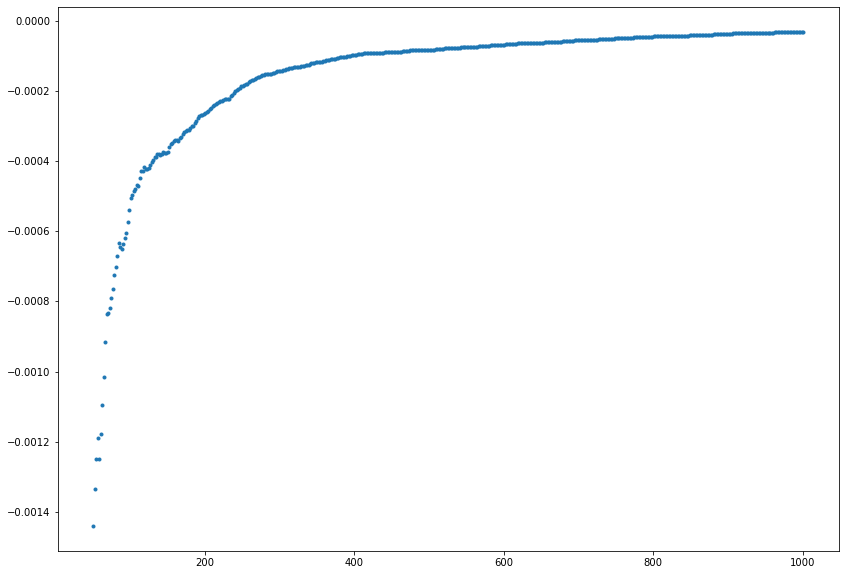

In [10]:
plt.figure(figsize=(14,10))
plt.plot(df['num_steps'], df['error_LR'], 'o', markersize=3)
plt.savefig('PS4_Q1_LR')
plt.show()